###  Supermarket Mall Customer Segmentation Data using K-Means Clustering

#### Dataset: Mall Customer Segmentation  
Source: [Mall Customers Dataset on Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

#### About the Dataset
This dataset originates from a supermarket mall that uses membership cards to collect and manage customer information. Each entry in the dataset represents a unique customer and includes key demographic and behavioral attributes that can be used for customer segmentation, targeted marketing, or personalized service offerings.

#### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


#### Objective:

We aim to segment customers based on:
- **Annual Income (k$)**
- **Spending Score (1–100)**

This helps understand customer behavior and group them into meaningful clusters for targeted marketing.

#### Import Necessary Libraries

In [153]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.cluster import KMeans # clustering algorithms
from sklearn.preprocessing import StandardScaler, LabelEncoder # feature scaling, encoding
from sklearn.metrics import silhouette_score # silhouette score for evaluating clustering
from yellowbrick.cluster import KElbowVisualizer # elbow method for optimal k
import joblib # for saving and loading models

#### Load Dataset

In [73]:
# load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [74]:
df = data.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Rename Columns

In [75]:
# rename columns for better readability
df.rename(columns={
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income_k',
    'Spending Score (1-100)': 'spending_score'
}, inplace=True)

In [16]:
# print new columns
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income_k', 'spending_score'], dtype='object')

#### Label Encoding for Genger column

In [76]:
# encode gender column
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df.head()

,customer_id,gender,age,annual_income_k,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#### Exploratory Data Analysis (EDA)

In [18]:
# data size
print(f"Dataset size: {df.shape[0]} rows and {df.shape[1]} columns")

Dataset size: 200 rows and 5 columns


In [19]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   customer_id      200 non-null    int64
 1   gender           200 non-null    int64
 2   age              200 non-null    int64
 3   annual_income_k  200 non-null    int64
 4   spending_score   200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [20]:
# view gender unique values
df['gender'].value_counts()

gender
0    112
1     88
Name: count, dtype: int64

In [21]:
# missing Values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
missing_values

Missing values in each column:


customer_id        0
gender             0
age                0
annual_income_k    0
spending_score     0
dtype: int64

In [23]:
# summary statistics
print("Summary statistics:")
df.describe().round(2)

Summary statistics:


,customer_id,gender,age,annual_income_k,spending_score
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,0.44,38.85,60.56,50.20
std,57.88,0.50,13.97,26.26,25.82
min,1.00,0.00,18.00,15.00,1.00
25%,50.75,0.00,28.75,41.50,34.75
50%,100.50,0.00,36.00,61.50,50.00
75%,150.25,1.00,49.00,78.00,73.00
max,200.00,1.00,70.00,137.00,99.00


#### Handling Outliers

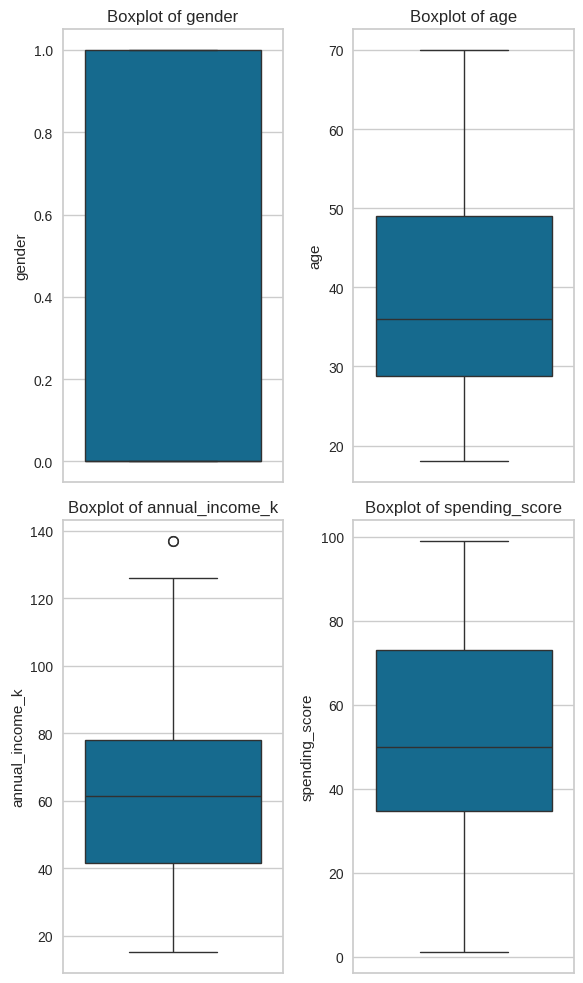

In [46]:
# visualize potential outliers using boxplots
X = df[['gender', 'age', 'annual_income_k', 'spending_score']]
plt.figure(figsize=(6, 10))
for idx, col in enumerate(X.columns):
    plt.subplot(2, 2, idx + 1)
    sns.boxplot(y=X[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [47]:
# identify outliers using the IQR method
outlier_indices = set()
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)].index
    outlier_indices.update(outliers)

print(f"Number of outlier rows detected: {len(outlier_indices)}")

Number of outlier rows detected: 2


In [55]:
# remove outliers from X and df
outlier_indices_list = list(outlier_indices)
X_no_outliers = X.drop(index=[idx for idx in outlier_indices_list if idx in X.index])
df = df.drop(index=[idx for idx in outlier_indices_list if idx in df.index]).reset_index(drop=True)

In [56]:
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income_k', 'spending_score',
       'cluster_kmeans'],
      dtype='object')

#### Visualization

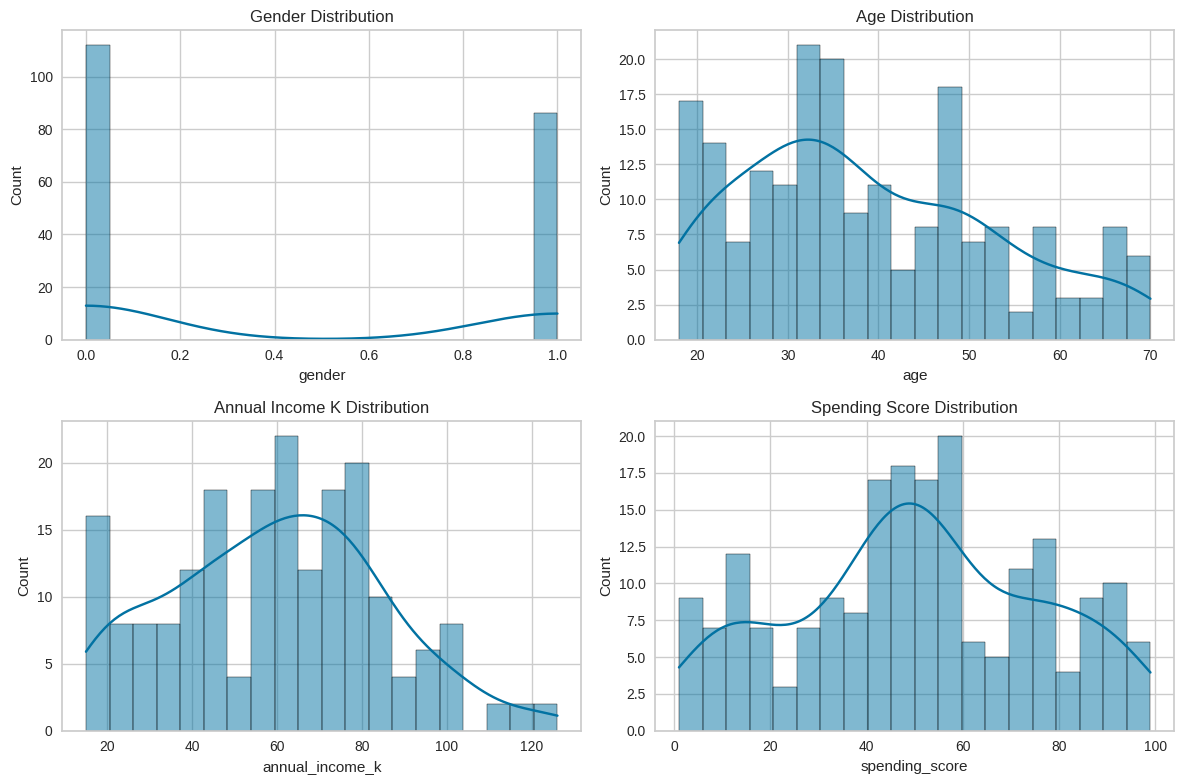

In [57]:
# plotting the distribution for each feature
features = ['gender', 'age', 'annual_income_k', 'spending_score']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f"{feature.replace('_', ' ').title()} Distribution")
plt.tight_layout()
plt.show()

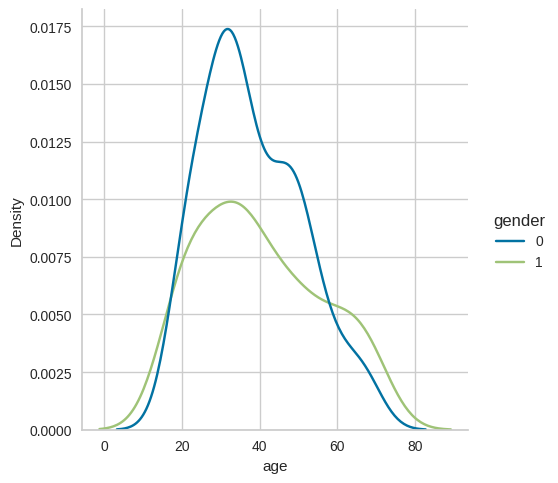

In [58]:
# visual gender density
sns.displot(df, x = 'age',hue='gender', kind='kde')
plt.show()

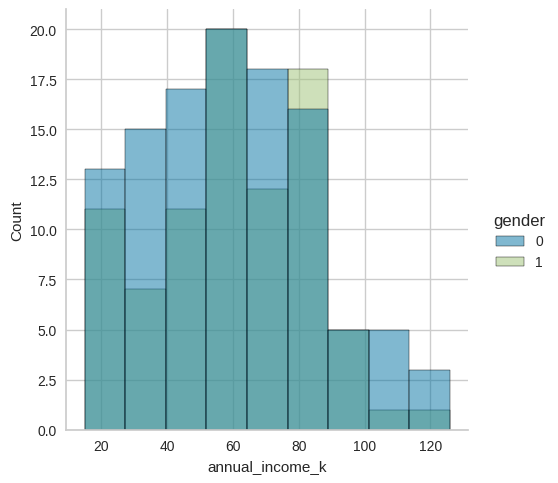

In [59]:
# distribution of annual income by gender
sns.displot(df, x = 'annual_income_k',hue='gender', kind='hist')
plt.show()

#### Feature Selection & Scaling
K-Means and Hierarchical Clustering are distance-based algorithms; scaling ensures equal feature influence. If you don’t scale the features, the algorithm will give much more importance to `Annual Income` simply because its numbers are larger. This causes `bias in clustering`, because the algorithm will mostly group based on income and largely ignore age.

#### K-Means Clustering (Partion Based Clustering)

The Elbow Method is a technique used in K-Means Clustering to determine the optimal number of clusters (K) by evaluating how the Within-Cluster Sum of Squares (WCSS) changes as K increases. The elbow point indicates the optimal number of clusters. Before the elbow, adding more clusters significantly improves clustering (reduces WCSS). After the elbow, adding more clusters yields diminishing returns.

---

##### 1. Annual Income and Spending Score

In [145]:
# select features annual_income_k, spending_score for clustering
X = df[['annual_income_k', 'spending_score']] 

# standardize features
scaler_annual_income = StandardScaler()
X_annual_income = scaler_annual_income.fit_transform(X)

print("\nScaled Data Sample:")
X_annual_income[:5]


Scaled Data Sample:


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

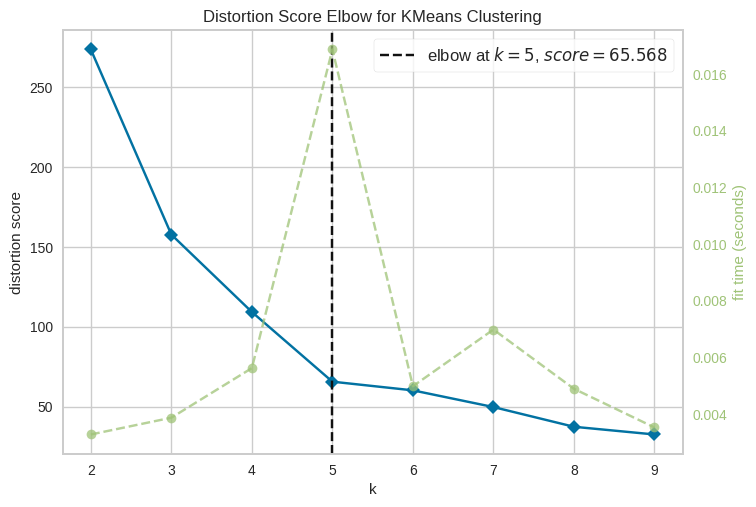

In [118]:
# getting optimal number of clusters using yellowbrick
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_annual_income)
visualizer.show()
plt.show()

**Interpretation**

The graphs above show the reduction of a distortion score as the number of clusters increases. However, there is no clear "elbow" visible. The underlying algorithm suggests 5 clusters. A choice of 5 clusters seems to be fair since it is where the distortion score starts decreasing less sharply — meaning additional clusters give diminishing returns

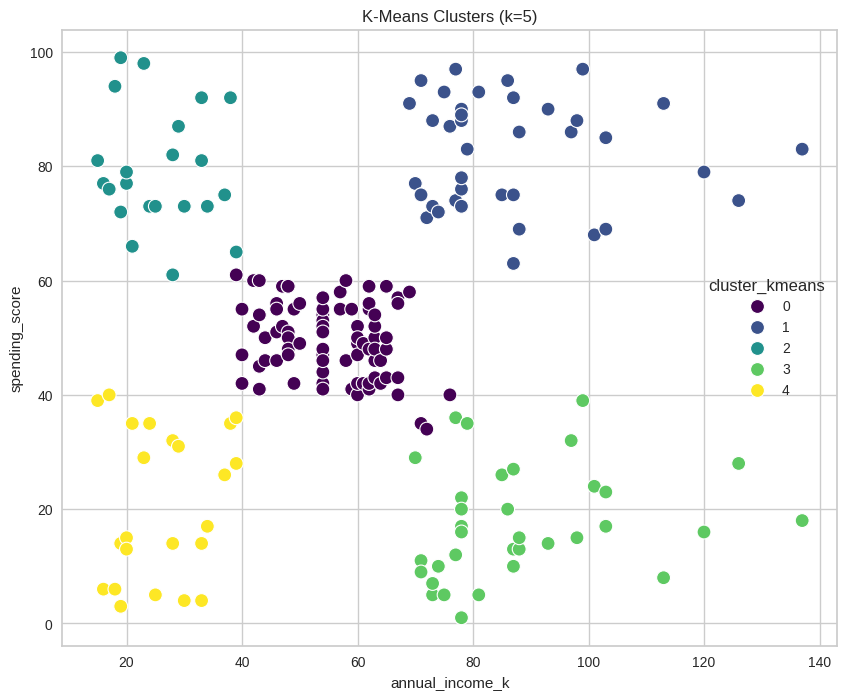

In [146]:
# training KMeans with optimal k=5 from the elbow method
kmeans_annual_income = KMeans(n_clusters=5, random_state=42)
df['cluster_kmeans'] = kmeans_annual_income.fit_predict(X_annual_income)

# plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='annual_income_k', y='spending_score', hue='cluster_kmeans', palette='viridis', s=100)
plt.title("K-Means Clusters (k=5)")
plt.show()

**Cluster Descriptions (Based on K-Means Clustering with k=6)**

| Cluster | Color (in Plot) | Income Level       | Spending Level     | Description                               |
|---------|------------------|---------------------|---------------------|-------------------------------------------|
| 0       | Purple            | Medium               | Medium               | Average consumers with moderate behavior. |
| 1       | Dark Blue         | High                 | Medium to High       | Wealthy customers, spending varies.       |
| 2       | Teal/Blue-Green   | High                 | Low                  | Cautious high earners; savings-focused.   |
| 3       | Light Green       | Medium to High       | High                 | Ideal target customers; high value.       |
| 4       | Yellow            | Low                  | Low                  | Budget-conscious or constrained group.    |

**Annual Income Silhouette Scores**

In [147]:
# silhouette scores
annual_income_kmeans_score = silhouette_score(X_annual_income, df['cluster_kmeans'])
print(f"Annual Income Silhouette Score for K-Means: {round(annual_income_kmeans_score, 2)}")

Annual Income Silhouette Score for K-Means: 0.55


In [142]:
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income_k', 'spending_score',
       'cluster_kmeans', 'cluster_kmeans_annual', 'cluster_kmeans_gender'],
      dtype='object')

In [158]:
# predicting new data (single annual income and spending score)
new_data = pd.DataFrame({
    'annual_income_k': [60],
    'spending_score': [30]
})

new_data_scaled = scaler_annual_income.transform(new_data)
prediction = kmeans_annual_income.predict(new_data_scaled)
print(f"Cluster for annual income 60 and spending score 30: Cluster {prediction[0]}")

Cluster for annual income 60 and spending score 30: Cluster 0


In [154]:
# save the model and scaler
joblib.dump(kmeans_annual_income, 'kmeans_annual_income_model.pkl')
joblib.dump(scaler_annual_income, 'scaler_annual_income.pkl')

['scaler_annual_income.pkl']

In [159]:
# load the model and scaler
kmeans_loaded = joblib.load('kmeans_annual_income_model.pkl')
scaler_loaded = joblib.load('scaler_annual_income.pkl')

# predict using the loaded model
new_data_scaled_loaded = scaler_loaded.transform(new_data)
loaded_prediction = kmeans_loaded.predict(new_data_scaled_loaded)
print(f"Loaded model prediction for annual income 60 and spending score 30: Cluster {loaded_prediction[0]}")

Loaded model prediction for annual income 60 and spending score 30: Cluster 0


---

##### 2. Gender and Spending Score

In [97]:
# select features gender, spending_score for clustering
X_gender = df[['gender', 'spending_score']] 

# standardize features
scaler = StandardScaler()
X_gender = scaler.fit_transform(X_gender)

print("\nScaled Data Sample:")
X_gender[:5]


Scaled Data Sample:


array([[ 1.12815215, -0.43480148],
       [ 1.12815215,  1.19570407],
       [-0.88640526, -1.71591298],
       [-0.88640526,  1.04041783],
       [-0.88640526, -0.39597992]])

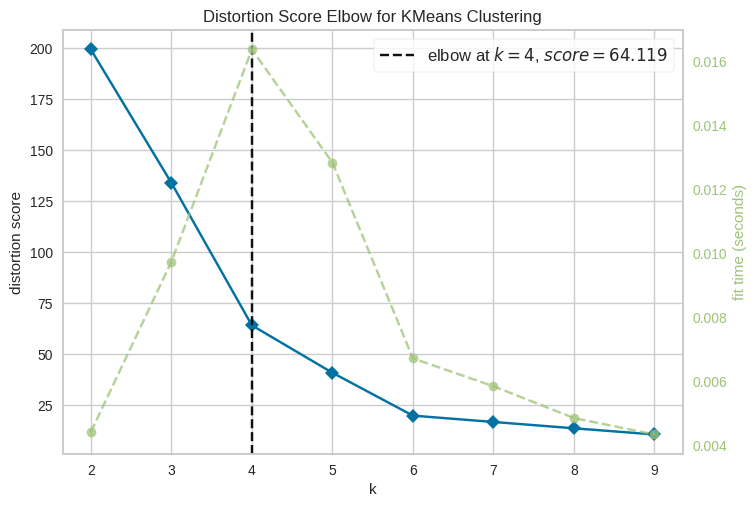

In [121]:
# getting optimal number of clusters using yellowbrick
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_gender)
visualizer.show()
plt.show()

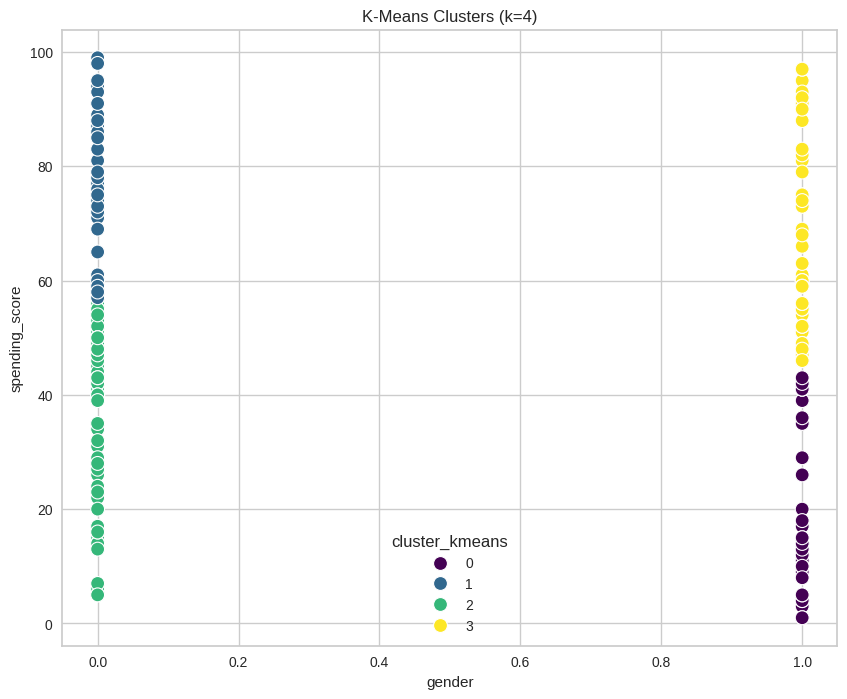

In [132]:
# training KMeans with optimal k=4 from the elbow method
kmeans_gender = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans_gender.fit_predict(X_gender)

# plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='gender', y='spending_score', hue='cluster_kmeans', palette='viridis', s=100)
plt.title("K-Means Clusters (k=4)")
plt.show()

**Interpretation**

The visualization suggests that spending score is a more significant factor than gender in differentiating these customer groups.

**Gender silhouette scores**

In [124]:
# silhouette scores
gender_kmeans_score = silhouette_score(X_gender, df['cluster_kmeans'])
print(f"Gender Silhouette Score for K-Means: {round(gender_kmeans_score, 2)}")

Gender Silhouette Score for K-Means: 0.56


---

##### 3. Age and Spending Score

In [125]:
# select features age, spending_score for clustering
X_age = df[['age', 'spending_score']] 

# standardize features
scaler = StandardScaler()
X_age = scaler.fit_transform(X_age)

print("\nScaled Data Sample:")
X_age[:5]


Scaled Data Sample:


array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992]])

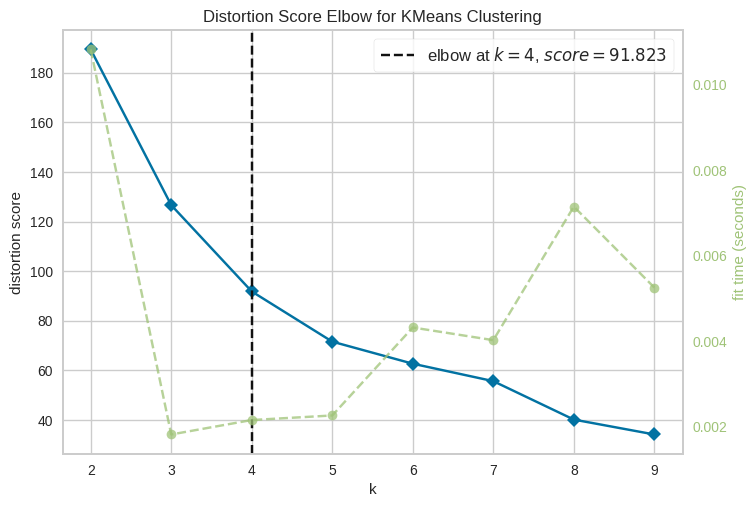

In [103]:
# getting optimal number of clusters using yellowbrick
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_age)
visualizer.show()
plt.show()

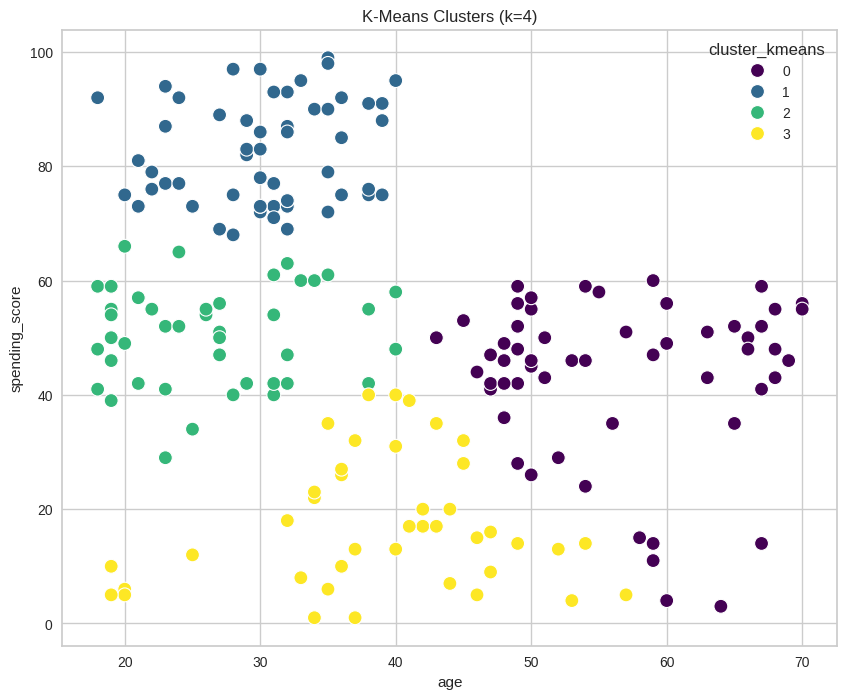

In [133]:
# training KMeans with optimal k=4 from the elbow method
kmeans_age = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans_age.fit_predict(X_age)

# plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='age', y='spending_score', hue='cluster_kmeans', palette='viridis', s=100)
plt.title("K-Means Clusters (k=4)")
plt.show()

In [128]:
# silhouette scores
age_kmeans_score = silhouette_score(X_age, df['cluster_kmeans'])
age_kmeans_score = round(age_kmeans_score, 2)
print(f"Age Silhouette Score for K-Means: {age_kmeans_score}")

Age Silhouette Score for K-Means: 0.41


---

#### Recommendations
- Personalized Marketing: Tailor campaigns based on cluster traits.
- Dynamic Pricing: Adjust for high-spending clusters.